In [2]:
# Dependencies
import requests
import json
#import wbdata
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# import csv data files
education_file = "Resources/education.csv"
childmarriage_file = "Resources/childmarriage.csv"

# create dataframes for each
education_file_df = pd.read_csv(education_file, encoding="ISO-8859-1")
childmarriage_file_df = pd.read_csv(childmarriage_file, encoding="ISO-8859-1")
countries_df = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

#education_file_df.head()
#childmarriage_file_df.head()
#countries_df[0]

In [3]:
filtered_education = education_file_df.filter(["Indicator"== "Youth literacy rate, population 15-24 years, both sexes (%)",
                                              "LOCATION", "Country","TIME", "Value"])
filtered_education.head()                       

,LOCATION,Country,TIME,Value
0,MAR,Morocco,1982,0.53256
1,MAR,Morocco,1994,0.64434
2,MAR,Morocco,2004,0.74865
3,MAR,Morocco,2008,0.81461
4,MAR,Morocco,2009,0.83185


In [4]:
childmarriage_file_df.head()
clean_childmarriage=childmarriage_file_df[['Geographic Area','Indicator','Sex','Time Period','Current Age',
                           'Observation Value','Unit of Measure','The period of time for which data are provided']]
clean_childmarriage = clean_childmarriage.rename(columns={"Geographic Area":"Country"})
clean_childmarriage.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,The period of time for which data are provided
0,Botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,1988
1,Uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,2002
2,Philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,2003
3,South Africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,2003
4,South Africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,2003


In [5]:
countries_df[0]
clean_countries = countries_df[0].rename(columns={"name":"Country","country":"Abbr"})
clean_countries.head()

,Abbr,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
# make country lowercase
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda x: x.lower())
clean_countries["Country"] = clean_countries["Country"].map(lambda x: x.lower())
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())

In [7]:
childmarriage_final = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
childmarriage_final = childmarriage_final.drop(columns=["The period of time for which data are provided","Abbr"])
childmarriage_final
childmarriage_final.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017
3,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,-30.559482,22.937506
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506


In [8]:
education_final = pd.merge(filtered_education, clean_countries, how="left", on="Country")
education_final = education_final.drop(columns=["LOCATION","Abbr"])
education_final.head()

,Country,TIME,Value,latitude,longitude
0,morocco,1982,0.53256,31.791702,-7.09262
1,morocco,1994,0.64434,31.791702,-7.09262
2,morocco,2004,0.74865,31.791702,-7.09262
3,morocco,2008,0.81461,31.791702,-7.09262
4,morocco,2009,0.83185,31.791702,-7.09262


In [9]:
# from education_final dataset, group each country and get the mean of values
new_education_final=education_final.groupby(["Country"])
education_grouped_country=new_education_final["Value"].mean()
education_grouped_country_df=pd.DataFrame(education_grouped_country)
education_grouped_country_df

,Value
Country,
afghanistan,35.439102
africa (northern),55.736070
africa (sub-saharan),51.741533
albania,74.590923
algeria,67.323016
...,...
western asia and northern africa,61.662127
world,63.969104
yemen,51.241751


In [10]:
# childmarriage_final dataset, group each country and get the mean of values
new_childmarriage_final=childmarriage_final.groupby(["Country"])
childmarriage_grouped_country=new_childmarriage_final["Observation Value"].mean()
childmarriage_grouped_country_df=pd.DataFrame(childmarriage_grouped_country)
childmarriage_grouped_country_df

,Observation Value
Country,
afghanistan,16.966667
albania,4.800000
algeria,1.450000
angola,14.733333
armenia,1.900000
...,...
vanuatu,9.500000
viet nam,4.733333
yemen,20.650000


In [11]:
# Merge data from childmarriage_grouped_country_df and education_grouped_country_df to compare
childmarriage_and_education = pd.merge(childmarriage_grouped_country_df, education_grouped_country_df, how="inner", on="Country")
childmarriage_and_education
childmarriage_and_education = childmarriage_and_education.rename(columns={"Observation Value":"Overall Averaged Child Marriage Value",
                                                                         "Value":"Averaged Education Value"})
childmarriage_and_education

,Overall Averaged Child Marriage Value,Averaged Education Value
Country,,
afghanistan,16.966667,35.439102
albania,4.800000,74.590923
algeria,1.450000,67.323016
angola,14.733333,56.702264
armenia,1.900000,75.139868
...,...,...
vanuatu,9.500000,65.044334
viet nam,4.733333,71.899058
yemen,20.650000,51.241751


y = -0.38155x + 35.65
The r-squared is: -0.6880431291174198


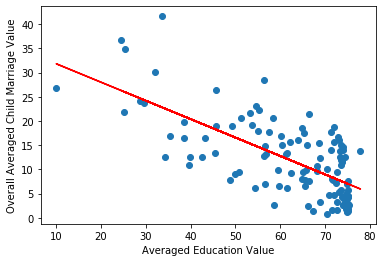

In [12]:
# Correlation of Education with child marriage
x_values = childmarriage_and_education['Averaged Education Value']
y_values = childmarriage_and_education['Overall Averaged Child Marriage Value']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Averaged Education Value")
plt.ylabel("Overall Averaged Child Marriage Value")
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()

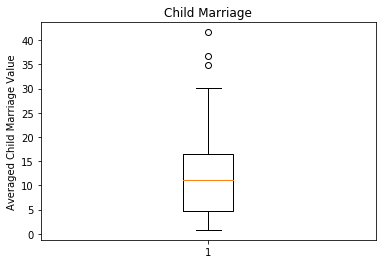

The lower quartile of averaged child marriage value is: 4.783333333333333
The upper quartile of averaged child marriage value is: 16.441666666666666
The interquartile range of averaged child marriage value is: 11.658333333333333
Values below -12.704166666666667 could be outliers.
Values above 33.92916666666667 could be outliers.
There are outliers for child marriage:
Country
central african republic    41.633333
chad                        34.866667
niger                       36.666667
Name: Overall Averaged Child Marriage Value, dtype: float64


In [13]:
# Boxplot for child marriage 
fig1, ax1 = plt.subplots()
ax1.set_title('Child Marriage')
ax1.set_ylabel('Averaged Child Marriage Value')
value=childmarriage_and_education["Overall Averaged Child Marriage Value"]
ax1.boxplot(value)
plt.show()
# Give quartile calculations
quartiles = value.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Print result for child marriage
print(f"The lower quartile of averaged child marriage value is: {lowerq}")
print(f"The upper quartile of averaged child marriage value is: {upperq}")
print(f"The interquartile range of averaged child marriage value is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"There are outliers for child marriage:")
outliers=value.loc[value > 33.92916666666667]
print(outliers)

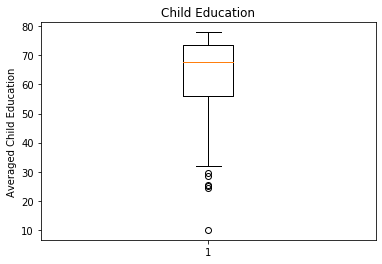

The lower quartile of averaged child education is: 56.120418125
The upper quartile of averaged child education is: 73.66726819078946
The interquartile range of averaged child education is: 17.546850065789457
Values below 29.800143026315816 could be outliers.
Values above 99.98754328947365 could be outliers.
There are outliers for child education:
Country
burkina faso    25.206404
chad            25.401568
guinea          28.705602
mali            29.714138
niger           24.506163
somalia         10.034673
Name: Averaged Education Value, dtype: float64


In [14]:
# Boxplot for child education 
fig1, ax1 = plt.subplots()
ax1.set_title('Child Education')
ax1.set_ylabel('Averaged Child Education')
value=childmarriage_and_education["Averaged Education Value"]
ax1.boxplot(value)
plt.show()
# Give quartile calculations
quartiles = value.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
# Print result for Campomulin
print(f"The lower quartile of averaged child education is: {lowerq}")
print(f"The upper quartile of averaged child education is: {upperq}")
print(f"The interquartile range of averaged child education is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers=value.loc[value < 29.800143026315816]
print(f"There are outliers for child education:")
print(outliers)

In [ ]:
# Question 3: What is the geographical impact on child marriage and education? (heat map one for education and one for child marriage)

In [ ]:
# Question 4: Is one gender more susceptible to child marriage than the other? (pie graph)

In [ ]:
# Conclusion: our null hypothesis is that education has no impact on child marriage rates.

In [ ]:
list1 = list(clean_childmarriage["Country"].unique())
list2 = list(clean_countries["Country"].unique())

print(len(list1), len(list2))

In [ ]:
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda x: x.lower())
clean_childmarriage.head()

In [ ]:
clean_countries["Country"] = clean_countries["Country"].map(lambda x: x.lower())
clean_countries.head()

In [ ]:
df_merge = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
df_merge.head()

In [ ]:
df_merge["Country"].unique()

In [ ]:
df_merge.loc[df_merge.isnull().any(axis=1)]

In [ ]:
df_merge.dtypes

In [ ]:
df_merge = df_merge.rename(columns={
    "Time Period":"TIME"
})
df_merge = df_merge.drop(columns=['The period of time for which data are provided'])
df_merge.head(1)


In [ ]:
filtered_education.head(1)

In [ ]:
filtered_education = filtered_education.drop(columns="LOCATION")
filtered_education.head(1)

In [ ]:
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())
filtered_education.head(1)

In [ ]:
df_merge.shape

In [ ]:
filtered_education.shape

In [ ]:
df_merge[["Country", "TIME"]].nunique()

In [ ]:
filtered_education[["Country", "TIME"]].nunique()

In [ ]:
quick_merge_df = pd.merge(df_merge, filtered_education, on=["Country", "TIME"])
quick_merge_df

In [ ]:
quick_merge_df

In [ ]:
quick_merge_df = pd.merge(df_merge, filtered_education, on=["Country", "TIME"], how="outer")
quick_merge_df.shape

In [ ]:
quick_merge_df.loc[quick_merge_df.isnull().any(axis=1)]

In [ ]:
filtered_education.dtypes

In [ ]:
df_merge.shape

In [ ]:
df_merge = df_merge.dropna(axis=0)
df_merge.shape

In [ ]:
df_merge.shape

In [ ]:
df_merge = df_merge.dropna(axis=0)
df_merge.shape

In [ ]:
clean_countries["Country"].unique()

In [ ]:
# Merge the child marriage dataframe with the education dataframe
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])


merge_df=pd.merge(pd.merge(clean_childmarriage,clean_countries,on='Country',),filtered_education,on='Country')
merge_df.dropna()
merge_df = merge_df.drop(columns=['The period of time for which data are provided'])
merge_df
#clean_df=merge_df.drop_duplicates('SN')

In [ ]:
print(merge_df["views"].max())
print(merge_df["views"].min())

In [ ]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 199999, 399999, 599999, 799999, 999999,
        1999999, 2999999, 3999999, 4999999, 50000000]

# Create labels for these bins
group_labels = ["0 to 199k", "200k to 399k", "400k to 599k", "600k to 799k", "800k to 999k", "1mil to 2mil",
                "2mil to 3mil", "3mil to 4mil", "4mil to 5mil", "5mil to 50mil"]

pd.cut(ted_df["views"], bins, labels=group_labels).head()

# Place the data series into a new column inside of the DataFrame
ted_df["View Group"] = pd.cut(ted_df["views"], bins, labels=group_labels)
ted_df.head()